In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
grass=pd.read_csv("Grass_Land.csv")
forest=pd.read_csv("forest.csv")

# 1. Temporal Analysis

Seasonal Trends: Analyze the Date and Year columns to detect patterns in bird sightings across different seasons or years.

In [4]:
forest['Date']=pd.to_datetime(forest['Date'])
grass['Date']=pd.to_datetime(grass['Date'])

forest['Month']=forest['Date'].dt.month
grass['Month']=grass['Date'].dt.month

In [5]:
def getseason(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
forest['Season'] = forest['Month'].apply(getseason)
grass['Season'] = grass['Month'].apply(getseason)

In [6]:
forest_season = forest['Season'].value_counts()
grass_season = grass['Season'].value_counts()
print(forest_season)
print(grass_season)

Season
Summer    6147
Spring    2386
Name: count, dtype: int64
Season
Summer    4342
Spring    2465
Name: count, dtype: int64


C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\686392664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=forest_season.index, y=forest_season.values, palette="copper", ax=axes[0])
C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\686392664.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grass_season.index, y=grass_season.values, palette="copper", ax=axes[1])


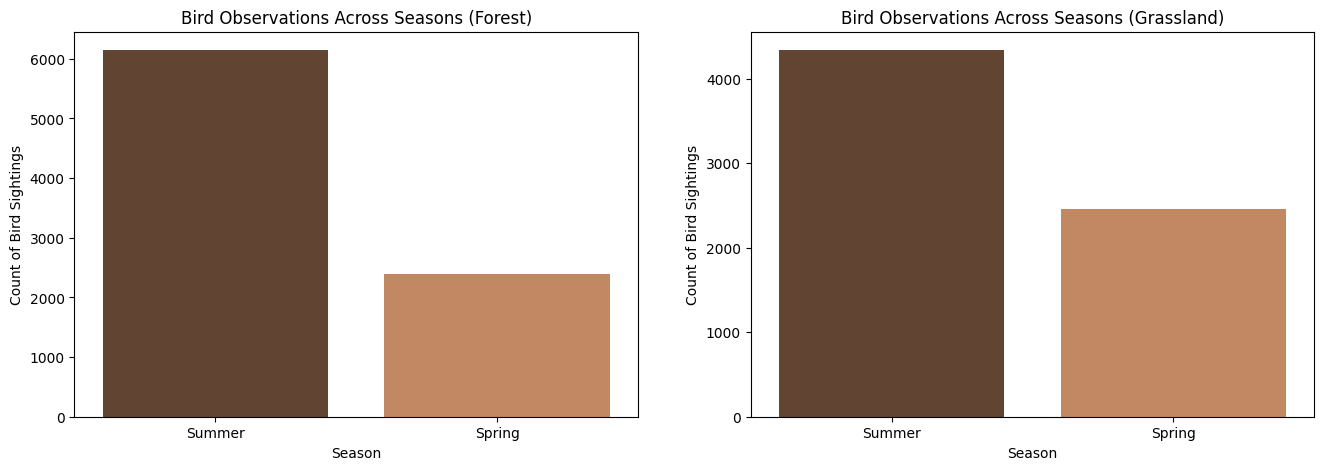

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns
#for forest
sns.barplot(x=forest_season.index, y=forest_season.values, palette="copper", ax=axes[0])
axes[0].set_title("Bird Observations Across Seasons (Forest)")
axes[0].set_xlabel("Season")
axes[0].set_ylabel("Count of Bird Sightings")
#for grassland
sns.barplot(x=grass_season.index, y=grass_season.values, palette="copper", ax=axes[1])
axes[1].set_title("Bird Observations Across Seasons (Grassland)")
axes[1].set_xlabel("Season")
axes[1].set_ylabel("Count of Bird Sightings")


plt.show()

Observation Time: Study the Start_Time and End_Time to determine if specific time windows correlate with higher bird activity.

In [8]:
forest["Start_Time"] = pd.to_datetime(forest["Start_Time"], format="%H:%M:%S").dt.hour
forest["End_Time"] = pd.to_datetime(forest["End_Time"], format="%H:%M:%S").dt.hour

grass["Start_Time"] = pd.to_datetime(grass["Start_Time"], format="%H:%M:%S").dt.hour
grass["End_Time"] = pd.to_datetime(grass["End_Time"], format="%H:%M:%S").dt.hour

In [9]:
forest_start_distribution = forest['Start_Time'].value_counts().sort_index()
forest_end_distribution = forest['End_Time'].value_counts().sort_index()

grass_start_distribution = grass['Start_Time'].value_counts().sort_index()
grass_end_distribution = grass['End_Time'].value_counts().sort_index()


In [10]:
print(forest_start_distribution.head())
print(forest_end_distribution.head())

Start_Time
5     633
6    2288
7    2329
8    1914
9     976
Name: count, dtype: int64
End_Time
5     315
6    2210
7    2347
8    1973
9    1195
Name: count, dtype: int64


In [11]:
print(grass_start_distribution.head())
print(grass_end_distribution.head())

Start_Time
5     652
6    1544
7    1678
8    1274
9    1034
Name: count, dtype: int64
End_Time
5     373
6    1523
7    1711
8    1305
9    1120
Name: count, dtype: int64


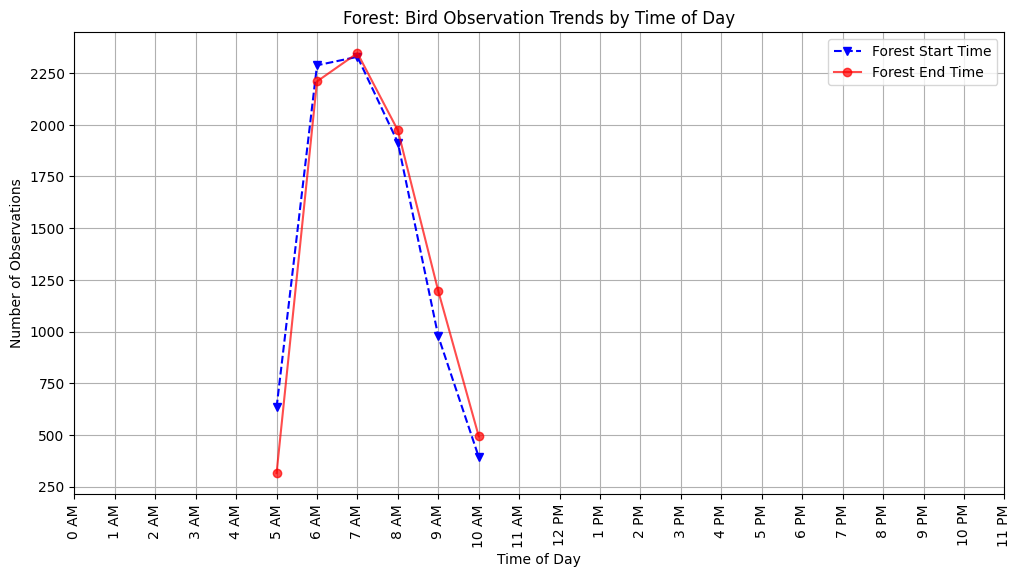

In [12]:
hour_labels = [f"{h} AM" if h < 12 else ("12 PM" if h == 12 else f"{h-12} PM") for h in range(24)]

#Plot for Forest
plt.figure(figsize=(12, 6))
plt.plot(forest_start_distribution.index, forest_start_distribution.values, marker='v', linestyle='--', color='b', label="Forest Start Time")
plt.plot(forest_end_distribution.index, forest_end_distribution.values, marker='o', linestyle='-', color='r', label="Forest End Time", alpha=0.7)

plt.xticks(range(24), hour_labels, rotation=90)  # Show 24-hour format as AM/PM
plt.title("Forest: Bird Observation Trends by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Observations")
plt.legend()
plt.grid(True)
plt.show()

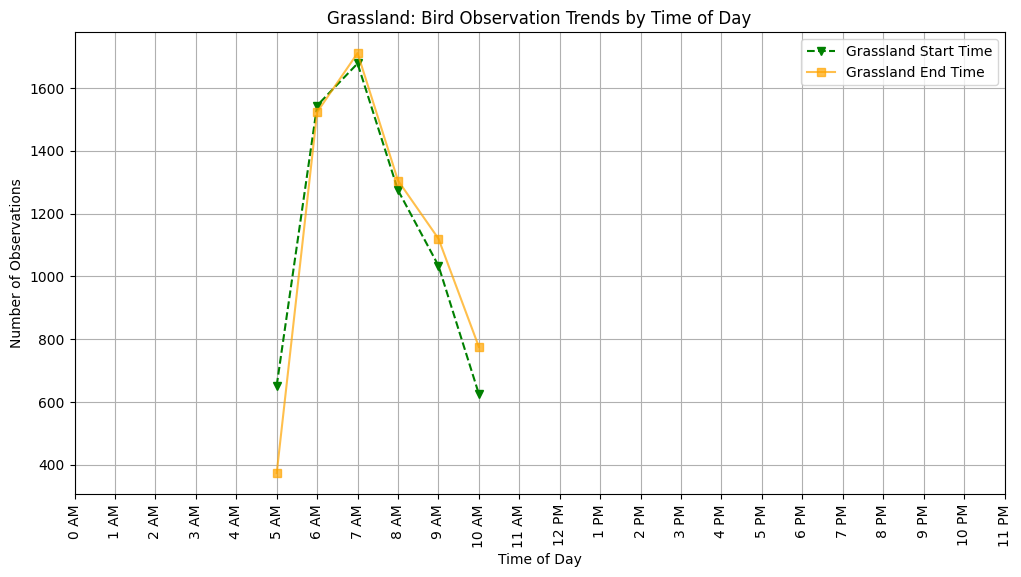

In [13]:
#Plot for Grassland
plt.figure(figsize=(12, 6))
plt.plot(grass_start_distribution.index, grass_start_distribution.values, marker='v', linestyle='--', color='g', label="Grassland Start Time")
plt.plot(grass_end_distribution.index, grass_end_distribution.values, marker='s', linestyle='-', color='orange', label="Grassland End Time", alpha=0.7)

plt.xticks(range(24), hour_labels, rotation=90)  # Show 24-hour format as AM/PM
plt.title("Grassland: Bird Observation Trends by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Observations")
plt.legend()
plt.grid(True)
plt.show()

# 2. Spatial Analysis

Location Insights: Group data by Location_Type (e.g., Grassland) to identify biodiversity hotspots.

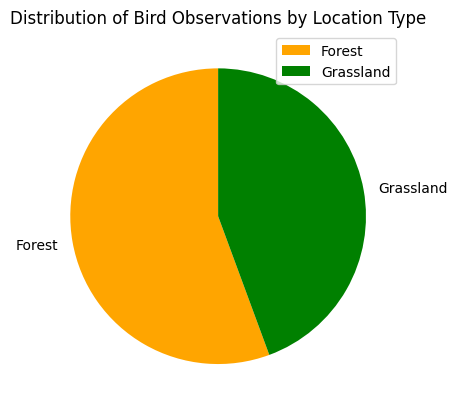

In [14]:
combined_df = pd.concat([forest, grass], ignore_index=True)
location_counts = combined_df["Location_Type"].value_counts()
plt.pie(location_counts.values,labels=location_counts.index,colors=['orange','green'], startangle=90)
plt.title("Distribution of Bird Observations by Location Type")
plt.legend(loc="upper right")
plt.show()

Plot-Level Analysis: Compare observations across different Plot_Name to see which plots attract more species or specific kinds of birds.

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\1839982133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=forest_top_plots.index, y=forest_top_plots.values, palette="viridis")


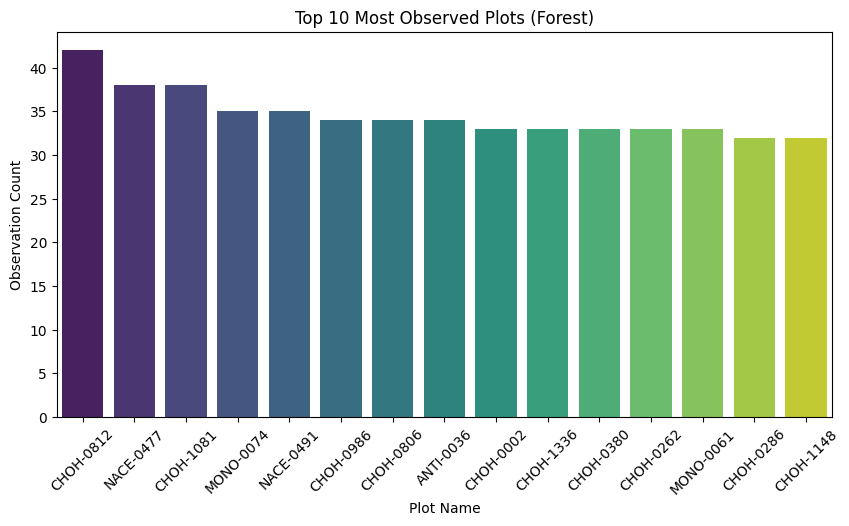

In [15]:
top_n = 15
forest_top_plots = forest['Plot_Name'].value_counts().nlargest(top_n)

# Plot for Forest
plt.figure(figsize=(10, 5))
sns.barplot(x=forest_top_plots.index, y=forest_top_plots.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Most Observed Plots (Forest)")
plt.xlabel("Plot Name")
plt.ylabel("Observation Count")
plt.show()


C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\2514182737.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grass_top_plots.index, y=grass_top_plots.values, palette="viridis")


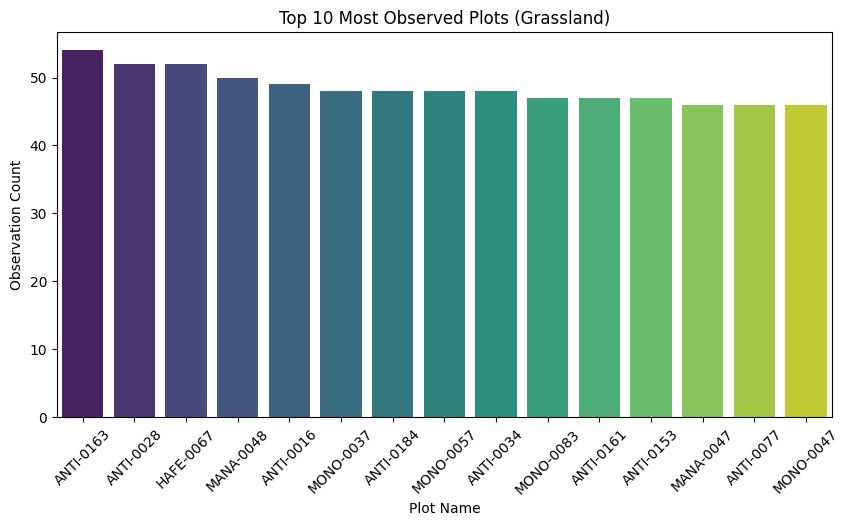

In [16]:
# Plot for Grassland
grass_top_plots = grass['Plot_Name'].value_counts().nlargest(top_n)
plt.figure(figsize=(10, 5))
sns.barplot(x=grass_top_plots.index, y=grass_top_plots.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Most Observed Plots (Grassland)")
plt.xlabel("Plot Name")
plt.ylabel("Observation Count")
plt.show()

# 3. Species Analysis

Diversity Metrics: Count unique species (Scientific_Name) observed and their distribution across Location_Type.

Total unique species observed: 0


C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\2124714472.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_species.index, y=location_species.values, palette="viridis")


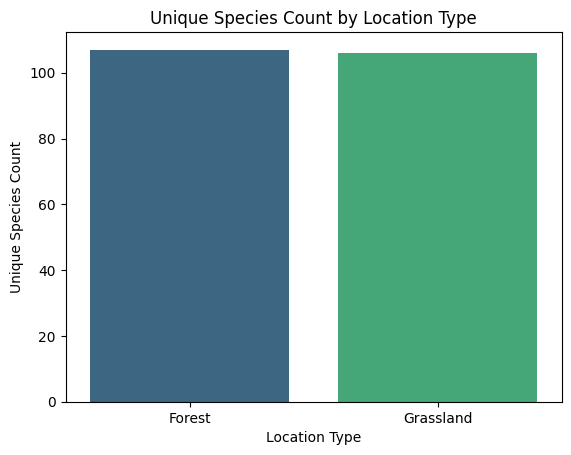

In [20]:
species_counts = pd.concat([forest,grass]).value_counts().nunique()
print(f"Total unique species observed: {species_counts}")

location_species = pd.concat([forest, grass]).groupby('Location_Type')['Scientific_Name'].nunique()
sns.barplot(x=location_species.index, y=location_species.values, palette="viridis")
plt.title("Unique Species Count by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Unique Species Count")
plt.show()

Activity Patterns: Check the Interval_Length and ID_Method columns to identify the most common activity types (e.g., Singing).

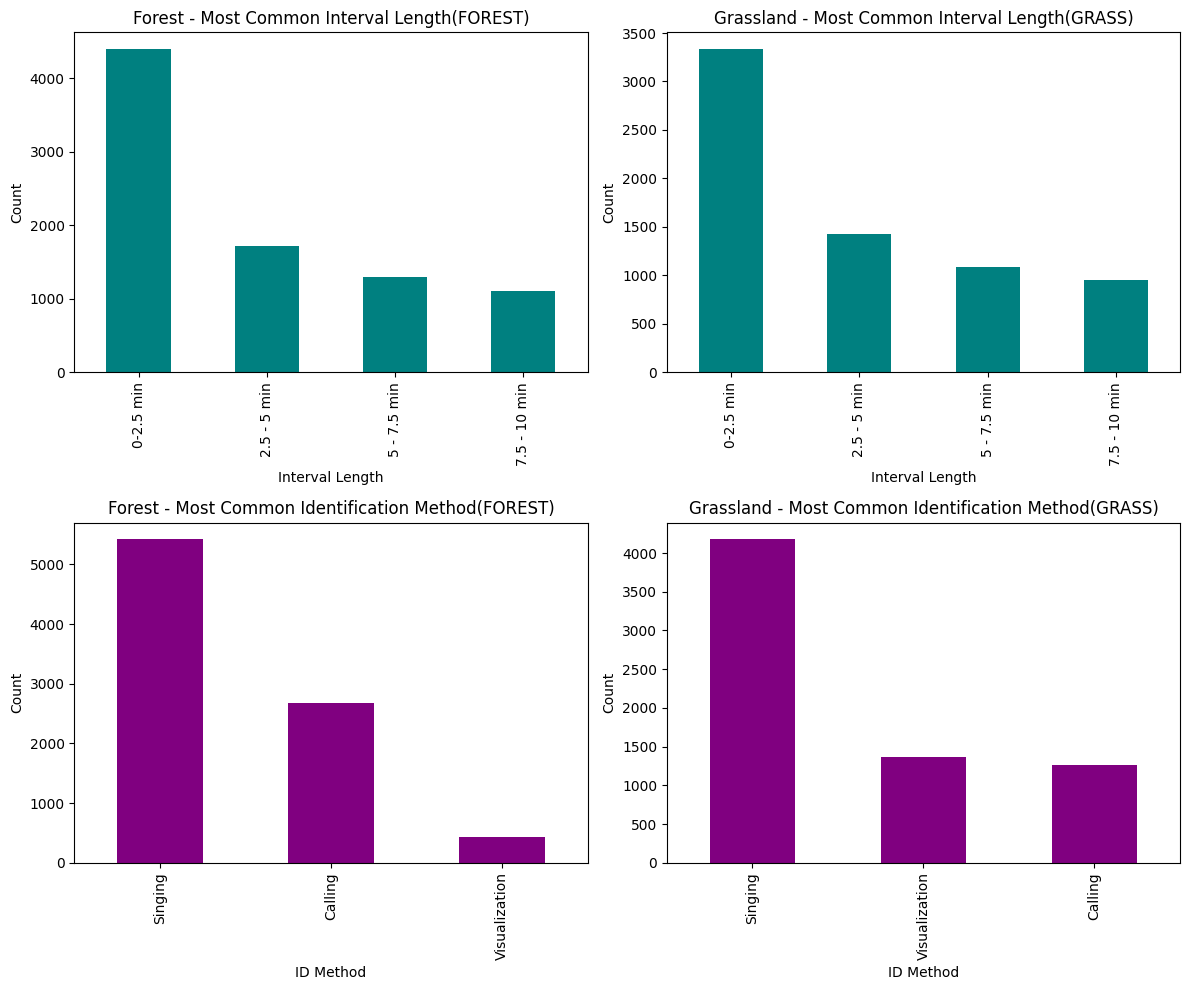

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Forest Interval Length
forest['Interval_Length'].value_counts().plot(kind='bar', ax=axes[0, 0], color='teal')
axes[0, 0].set_title("Forest - Most Common Interval Length(FOREST)")
axes[0, 0].set_xlabel("Interval Length")
axes[0, 0].set_ylabel("Count")

# Grassland Interval Length
grass['Interval_Length'].value_counts().plot(kind='bar', ax=axes[0, 1], color='teal')
axes[0, 1].set_title("Grassland - Most Common Interval Length(GRASS)")
axes[0, 1].set_xlabel("Interval Length")
axes[0, 1].set_ylabel("Count")

# Forest ID Method
forest['ID_Method'].value_counts().plot(kind='bar', ax=axes[1, 0], color='purple')
axes[1, 0].set_title("Forest - Most Common Identification Method(FOREST)")
axes[1, 0].set_xlabel("ID Method")
axes[1, 0].set_ylabel("Count")

# Grassland ID Method
grass['ID_Method'].value_counts().plot(kind='bar', ax=axes[1, 1], color='purple')
axes[1, 1].set_title("Grassland - Most Common Identification Method(GRASS)")
axes[1, 1].set_xlabel("ID Method")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

Sex Ratio: Analyze the Sex column to understand the male-to-female ratio for different species.

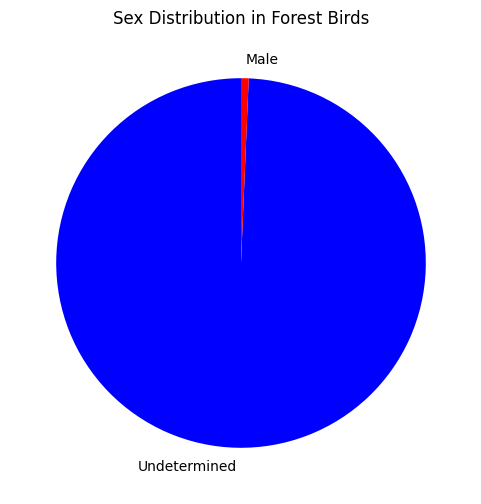

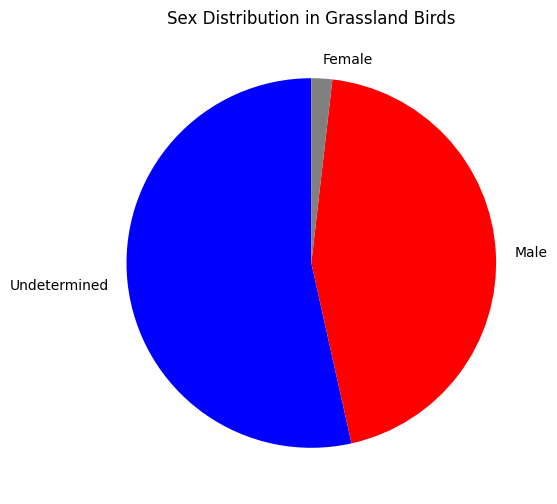

In [24]:
# Forest Sex Ratio
forest_sex_ratio = forest['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(forest_sex_ratio, labels=forest_sex_ratio.index, colors=['blue', 'red', 'gray'], startangle=90)
plt.title("Sex Distribution in Forest Birds")
plt.show()

# Grassland Sex Ratio
grassland_sex_ratio = grass['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(grassland_sex_ratio, labels=grassland_sex_ratio.index, colors=['blue', 'red', 'gray'], startangle=90)
plt.title("Sex Distribution in Grassland Birds")
plt.show()

# 4. Environmental Conditions

Weather Correlation: Explore how Temperature, Humidity, Sky, and Wind impact observations, such as the number of birds or their distances.

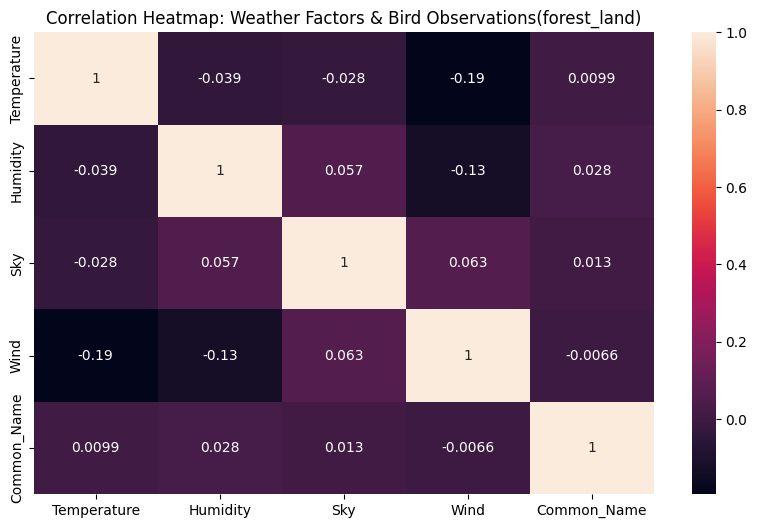

In [30]:
label_enc = LabelEncoder()
forest['Common_Name'] = label_enc.fit_transform(forest['Common_Name'])
forest['Sky'] = label_enc.fit_transform(forest['Sky'])
forest['Wind'] = label_enc.fit_transform(forest['Wind'])

numeric_cols = ['Temperature', 'Humidity', 'Sky', 'Wind', 'Common_Name', ]

plt.figure(figsize=(10, 6))
sns.heatmap(forest[numeric_cols].corr(), annot=True)
plt.title("Correlation Heatmap: Weather Factors & Bird Observations(forest_land)")
plt.show()

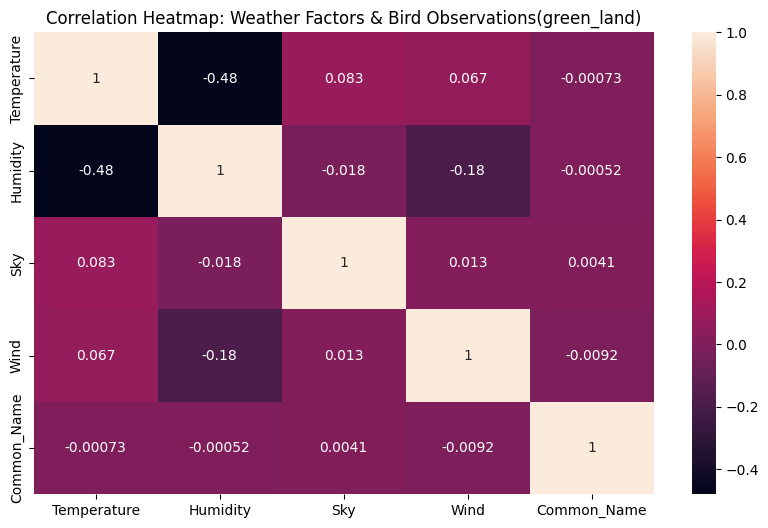

In [31]:
label_enc = LabelEncoder()
grass['Common_Name'] = label_enc.fit_transform(grass['Common_Name'])
grass['Sky'] = label_enc.fit_transform(grass['Sky'])
grass['Wind'] = label_enc.fit_transform(grass['Wind'])

numeric_cols = ['Temperature', 'Humidity', 'Sky', 'Wind', 'Common_Name', ]

plt.figure(figsize=(10, 6))
sns.heatmap(grass[numeric_cols].corr(), annot=True)
plt.title("Correlation Heatmap: Weather Factors & Bird Observations(green_land)")
plt.show()

Disturbance Effect: Assess the impact of Disturbance (e.g., slight effect) on bird sightings.

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\1786174164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=forest, x="Disturbance", order=forest["Disturbance"].value_counts().index, palette="viridis")


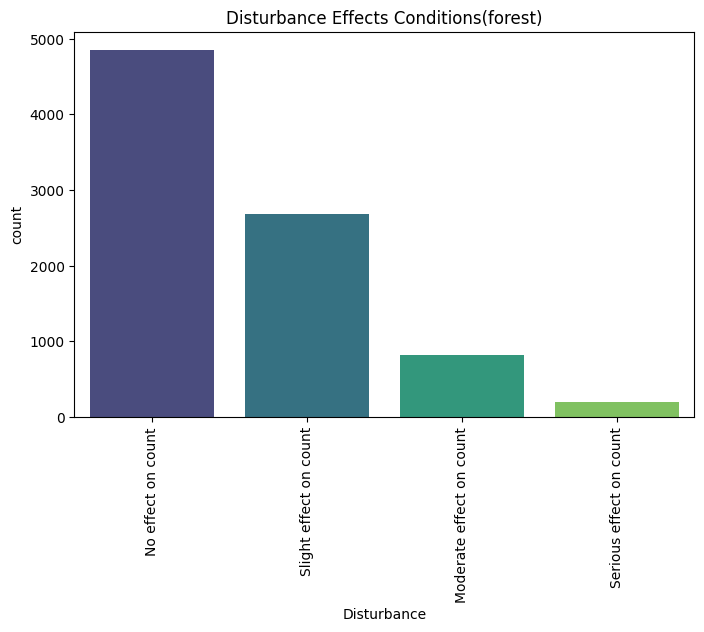

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(data=forest, x="Disturbance", order=forest["Disturbance"].value_counts().index, palette="viridis")
plt.title("Disturbance Effects Conditions(forest)")
plt.xticks(rotation=90)
plt.show()

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\152077103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=grass, x="Disturbance", order=grass["Disturbance"].value_counts().index, palette="viridis")


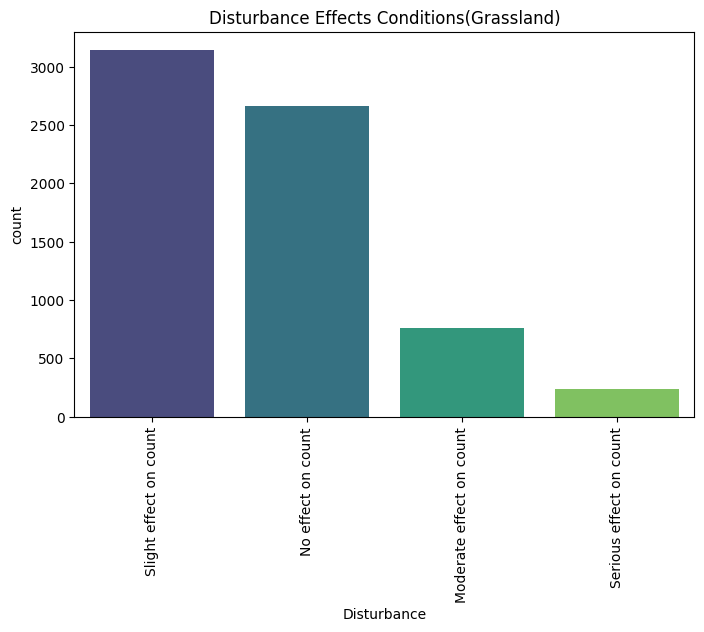

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=grass, x="Disturbance", order=grass["Disturbance"].value_counts().index, palette="viridis")
plt.title("Disturbance Effects Conditions(Grassland)")
plt.xticks(rotation=90)
plt.show()

# 5.  Distance and Behavior

Distance Analysis: Evaluate the Distance column to identify species typically observed closer or farther from the observer.

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\510422024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=forest, x="Distance", order=forest["Distance"].value_counts().index, palette="viridis")


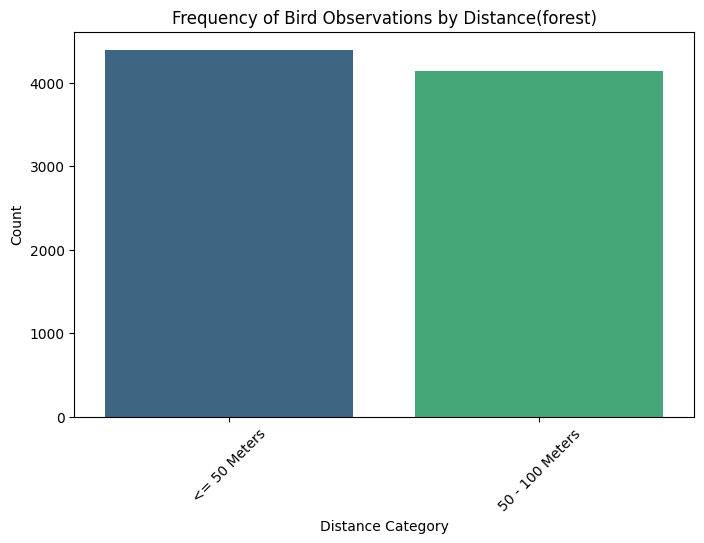

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(data=forest, x="Distance", order=forest["Distance"].value_counts().index, palette="viridis")
plt.title("Frequency of Bird Observations by Distance(forest)")
plt.xlabel("Distance Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\208278414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=grass, x="Distance", order=grass["Distance"].value_counts().index, palette="viridis")


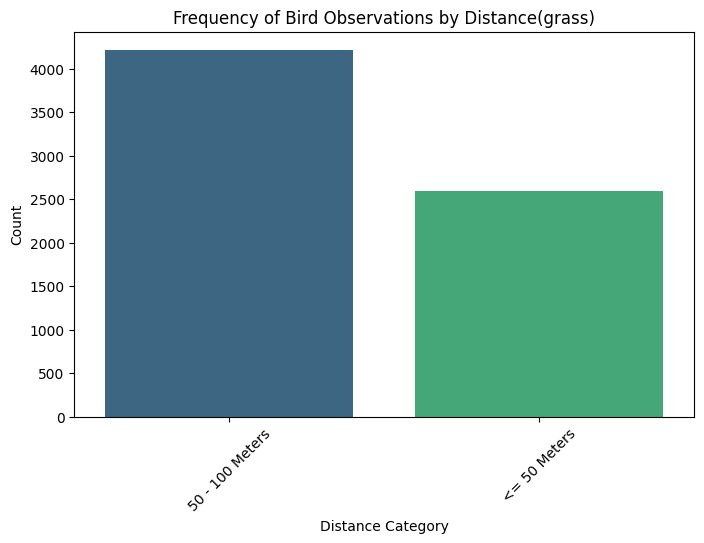

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(data=grass, x="Distance", order=grass["Distance"].value_counts().index, palette="viridis")
plt.title("Frequency of Bird Observations by Distance(grass)")
plt.xlabel("Distance Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Flyover Frequency: Examine the Flyover_Observed column to detect trends in bird behavior during observation.

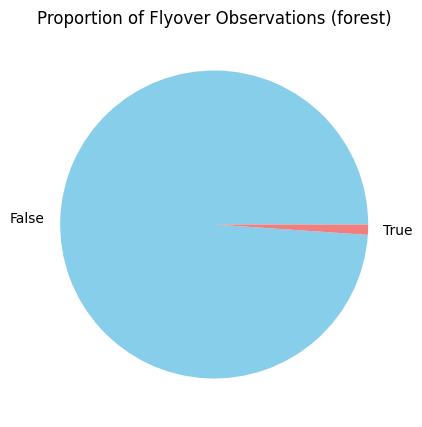

In [38]:
plt.figure(figsize=(5, 5))
forest["Flyover_Observed"].value_counts().plot.pie(colors=["skyblue", "lightcoral"])
plt.title("Proportion of Flyover Observations (forest)")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()

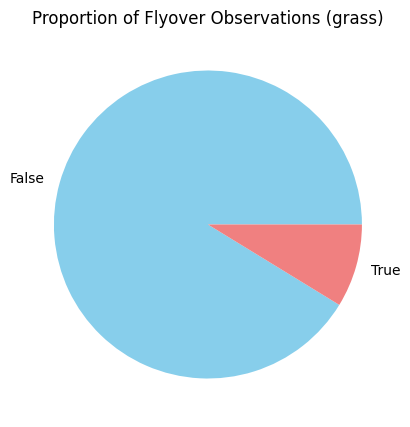

In [37]:
plt.figure(figsize=(5, 5))
grass["Flyover_Observed"].value_counts().plot.pie(colors=["skyblue", "lightcoral"])
plt.title("Proportion of Flyover Observations (grass)")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()

# 6. Observer Trends

Observer Bias: Analyze data by Observer to check if specific individuals report more observations or certain species.

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\2086751117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=forest, x="Observer", order=forest["Observer"].value_counts().index, palette="viridis")


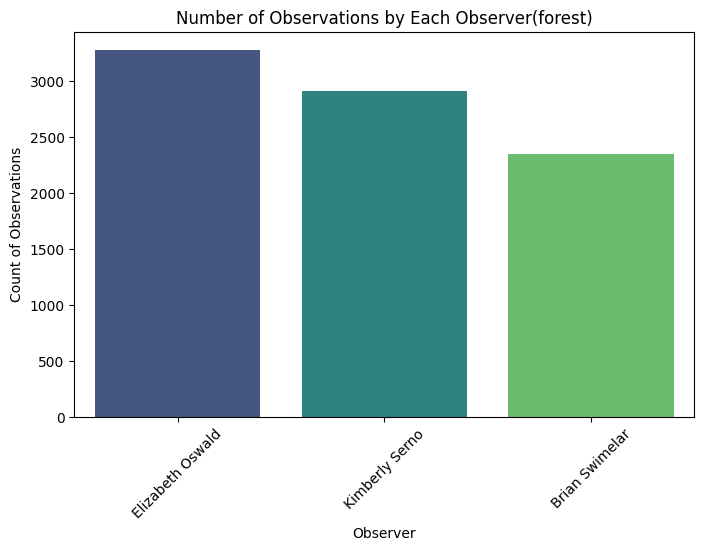

In [41]:

plt.figure(figsize=(8, 5))
sns.countplot(data=forest, x="Observer", order=forest["Observer"].value_counts().index, palette="viridis")
plt.title("Number of Observations by Each Observer(forest)")
plt.xlabel("Observer")
plt.ylabel("Count of Observations")
plt.xticks(rotation=45)
plt.show()

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\3492627053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=forest, x="Observer", order=grass["Observer"].value_counts().index,palette="viridis")


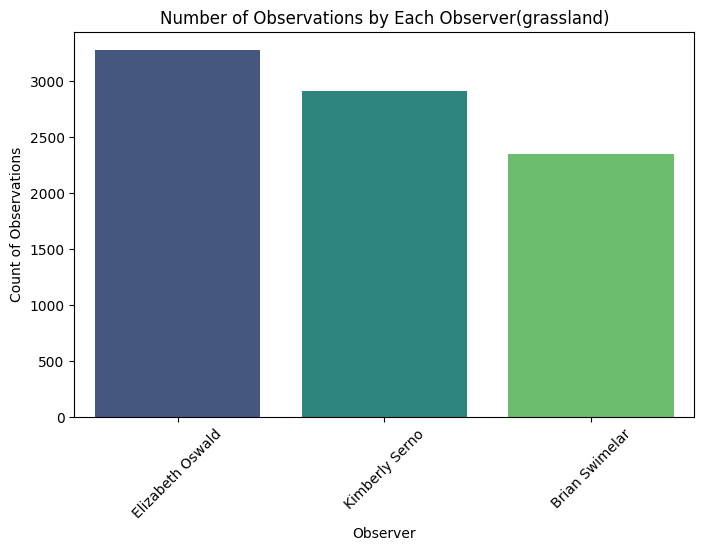

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(data=forest, x="Observer", order=grass["Observer"].value_counts().index,palette="viridis")
plt.title("Number of Observations by Each Observer(grassland)")
plt.xlabel("Observer")
plt.ylabel("Count of Observations")
plt.xticks(rotation=45)
plt.show()

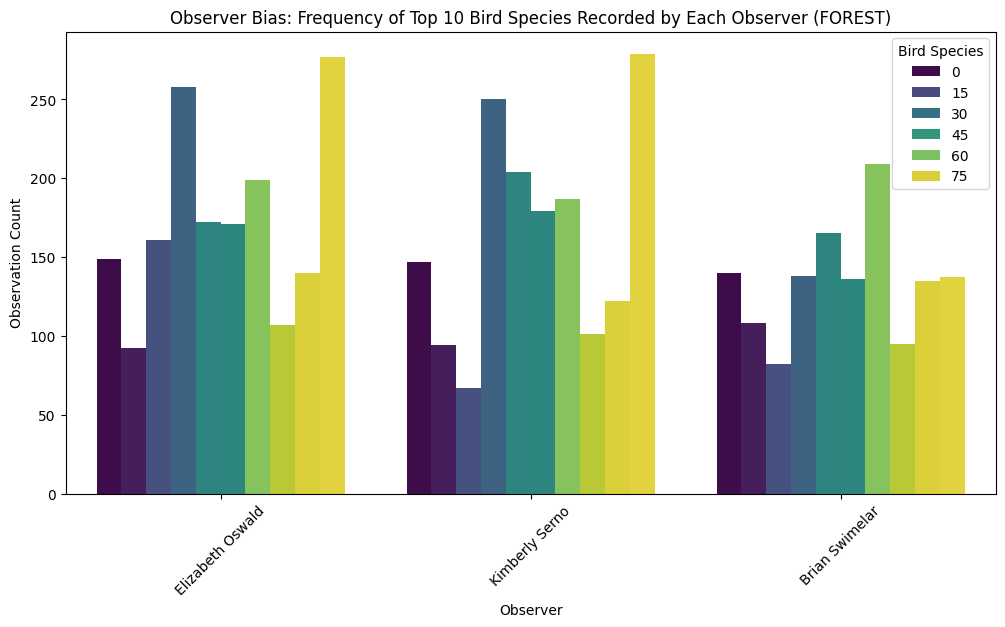

In [43]:
# Get the top 10 most observed bird species
top_species = forest["Common_Name"].value_counts().head(10).index

# Filter dataset to include only these species
filtered_df = forest[forest["Common_Name"].isin(top_species)]

# Plot the observer bias for these top species
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x="Observer", hue="Common_Name", palette="viridis")

# Formatting the plot
plt.title("Observer Bias: Frequency of Top 10 Bird Species Recorded by Each Observer (FOREST)")
plt.xlabel("Observer")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.legend(title="Bird Species", bbox_to_anchor=(1, 1))
plt.show()

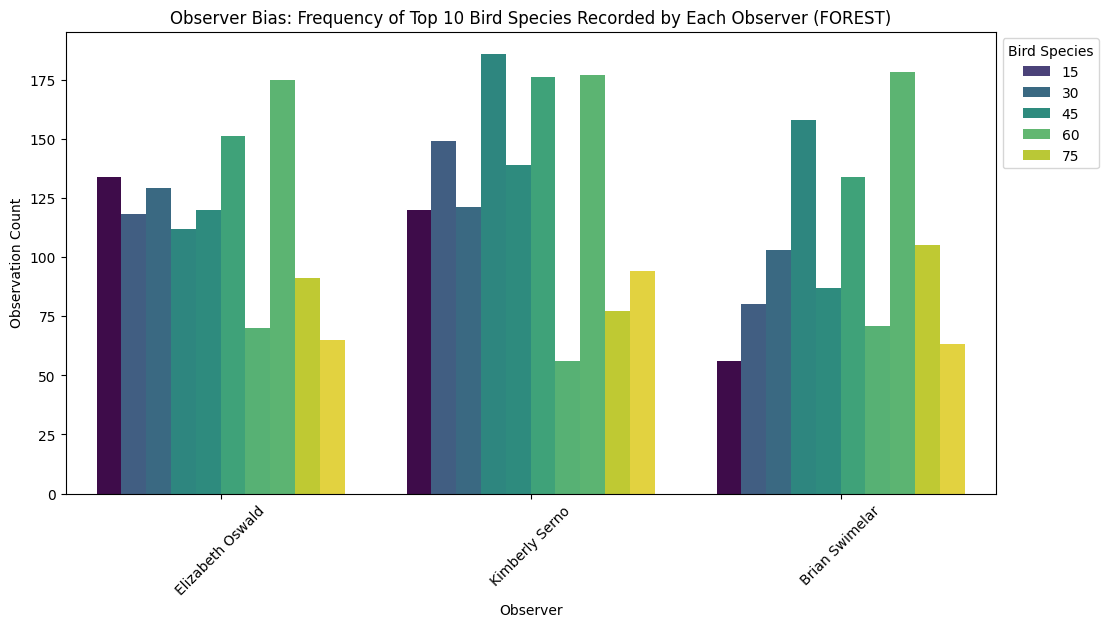

In [44]:
# for grassland
# Get the top 10 most observed bird species
top_species = grass["Common_Name"].value_counts().head(10).index

# Filter dataset to include only these species
filtered_df = grass[grass["Common_Name"].isin(top_species)]

# Plot the observer bias for these top species
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x="Observer", hue="Common_Name", palette="viridis")

# Formatting the plot
plt.title("Observer Bias: Frequency of Top 10 Bird Species Recorded by Each Observer (FOREST)")
plt.xlabel("Observer")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.legend(title="Bird Species", bbox_to_anchor=(1, 1))
plt.show()

Visit Patterns: Evaluate the Visit column to see how repeated visits affect species count or diversity.

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\1085592169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visit_species_count, x="Visit", y="Unique Species Count", palette="magma")


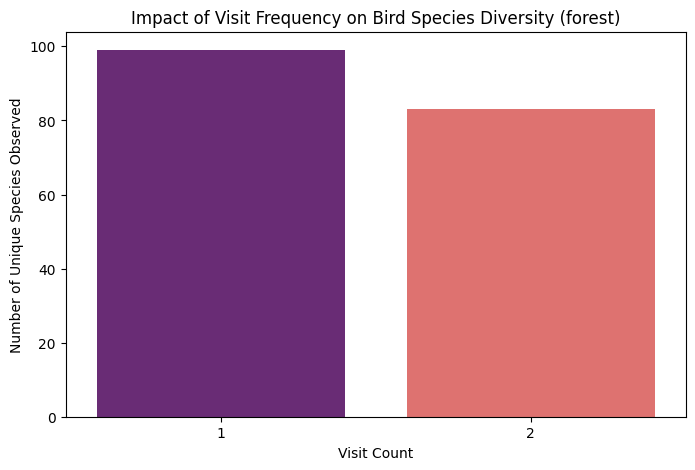

In [45]:
# for forest
# Count unique species observed per Visit
visit_species_count = forest.groupby("Visit")["Common_Name"].nunique().reset_index()

# Rename for clarity
visit_species_count.columns = ["Visit", "Unique Species Count"]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=visit_species_count, x="Visit", y="Unique Species Count", palette="magma")

# Formatting
plt.title("Impact of Visit Frequency on Bird Species Diversity (forest)")
plt.xlabel("Visit Count")
plt.ylabel("Number of Unique Species Observed")
plt.show()

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\452035871.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visit_species_count, x="Visit", y="Unique Species Count", palette="magma")


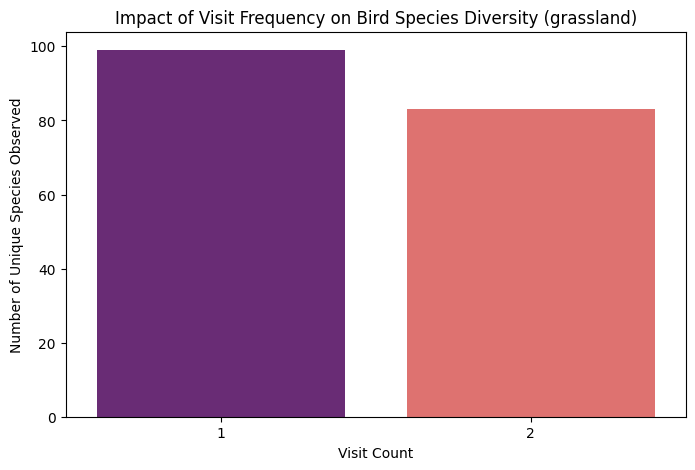

In [46]:
# for grassland
# Count unique species observed per Visit
visit_species_count = forest.groupby("Visit")["Common_Name"].nunique().reset_index()

# Rename for clarity
visit_species_count.columns = ["Visit", "Unique Species Count"]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=visit_species_count, x="Visit", y="Unique Species Count", palette="magma")

# Formatting
plt.title("Impact of Visit Frequency on Bird Species Diversity (grassland)")
plt.xlabel("Visit Count")
plt.ylabel("Number of Unique Species Observed")
plt.show()

# 7. Conservation Insights

Watchlist Trends: Use the PIF_Watchlist_Status and Regional_Stewardship_Status to identify trends in species that are at risk or require conservation focus.

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\3880548877.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Reds")
C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\3880548877.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")


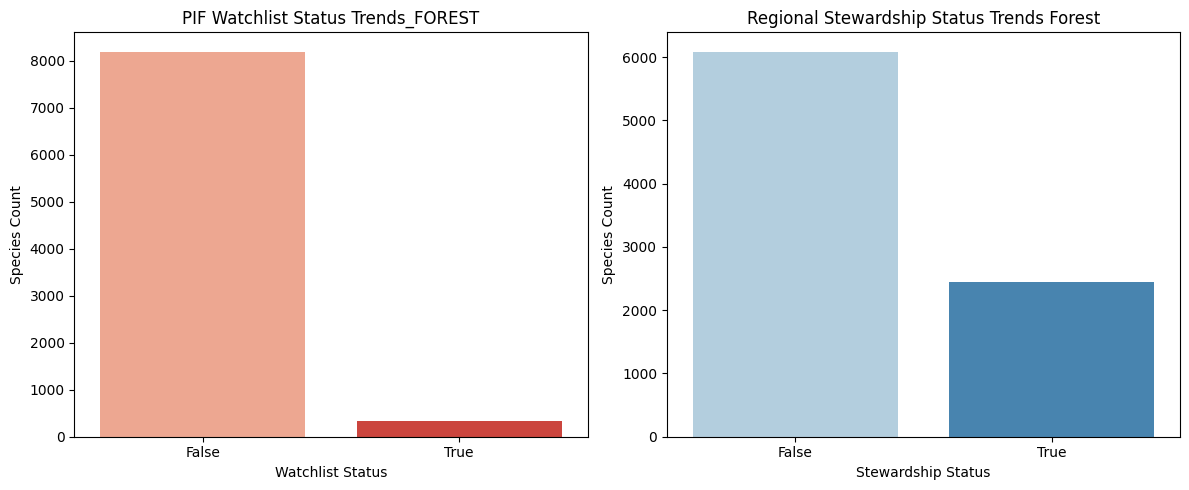

In [47]:
# Count the occurrences of each status in PIF_Watchlist_Status
watchlist_counts = forest["PIF_Watchlist_Status"].value_counts().reset_index()
watchlist_counts.columns = ["Status", "Count"]

# Count the occurrences of each status in Regional_Stewardship_Status
stewardship_counts = forest["Regional_Stewardship_Status"].value_counts().reset_index()
stewardship_counts.columns = ["Status", "Count"]

# Plot PIF Watchlist Trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Reds")
plt.title("PIF Watchlist Status Trends_FOREST")
plt.xlabel("Watchlist Status")
plt.ylabel("Species Count")

# Plot Regional Stewardship Trends
plt.subplot(1, 2, 2)
sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")
plt.title("Regional Stewardship Status Trends Forest")
plt.xlabel("Stewardship Status")
plt.ylabel("Species Count")

plt.tight_layout()
plt.show()

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\2623586388.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Reds")
C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\2623586388.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")


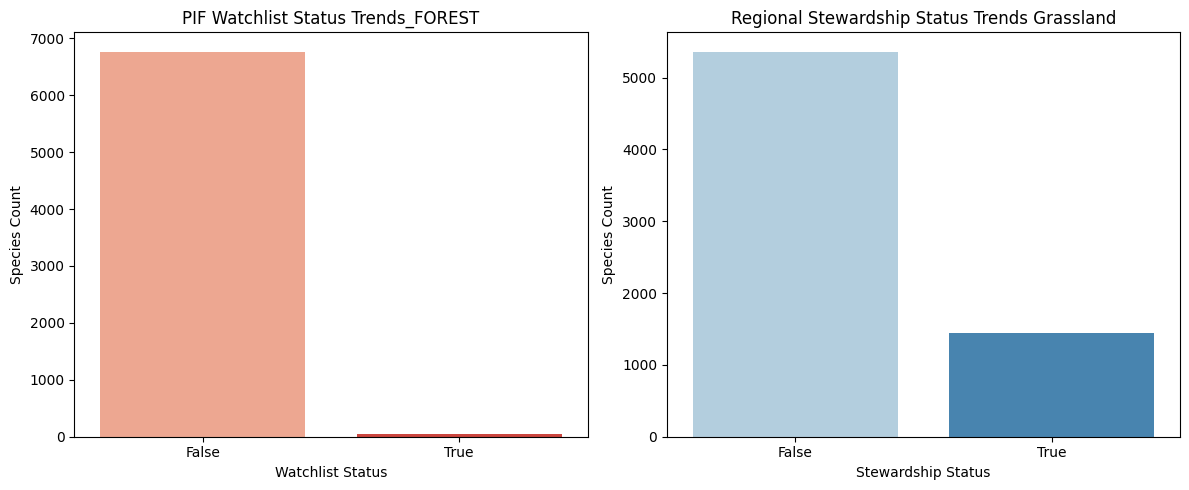

In [48]:
# Count the occurrences of each status in PIF_Watchlist_Status
watchlist_counts = grass["PIF_Watchlist_Status"].value_counts().reset_index()
watchlist_counts.columns = ["Status", "Count"]

# Count the occurrences of each status in Regional_Stewardship_Status
stewardship_counts = grass["Regional_Stewardship_Status"].value_counts().reset_index()
stewardship_counts.columns = ["Status", "Count"]

# Plot PIF Watchlist Trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Reds")
plt.title("PIF Watchlist Status Trends_FOREST")
plt.xlabel("Watchlist Status")
plt.ylabel("Species Count")

# Plot Regional Stewardship Trends
plt.subplot(1, 2, 2)
sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")
plt.title("Regional Stewardship Status Trends Grassland")
plt.xlabel("Stewardship Status")
plt.ylabel("Species Count")

plt.tight_layout()
plt.show()

AOU Code Patterns: Study the distribution of species based on their AOU_Code to correlate with regional or national conservation priorities.

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\497089782.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aou_counts.head(20), x="AOU_Code", y="Count", palette="mako")


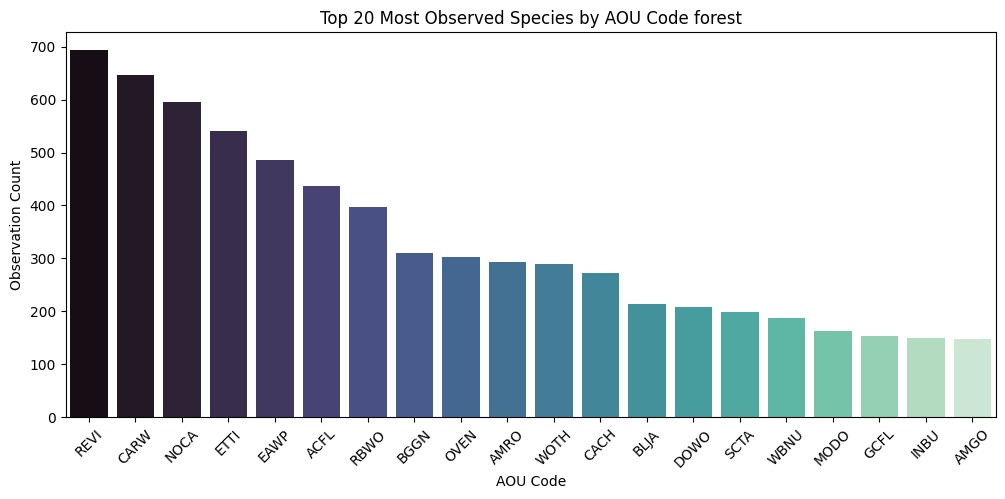

In [49]:
# Count the occurrences of each AOU Code
aou_counts = forest["AOU_Code"].value_counts().reset_index()
aou_counts.columns = ["AOU_Code", "Count"]

# Plot distribution of AOU Codes
plt.figure(figsize=(12, 5))
sns.barplot(data=aou_counts.head(20), x="AOU_Code", y="Count", palette="mako")
plt.title("Top 20 Most Observed Species by AOU Code forest")
plt.xlabel("AOU Code")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\3425960187.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aou_counts.head(20), x="AOU_Code", y="Count", palette="mako")


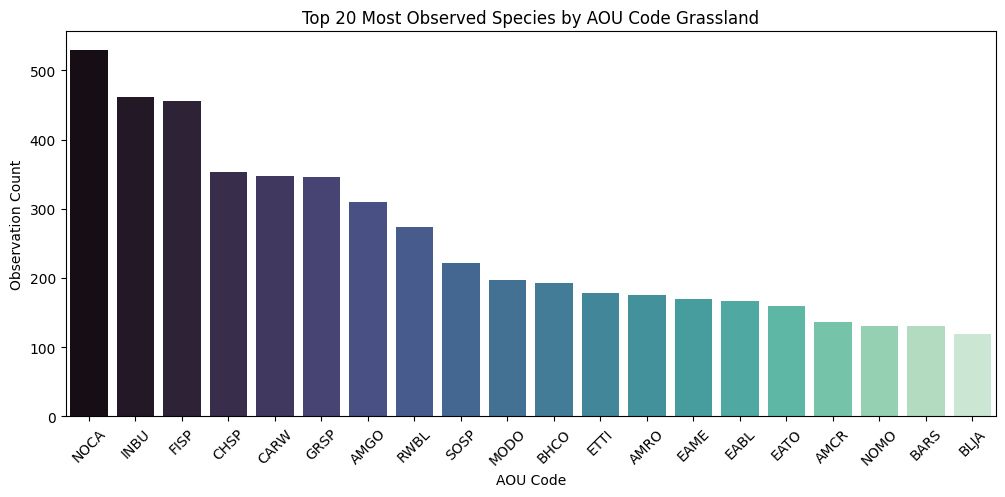

In [50]:
# Count the occurrences of each AOU Code
aou_counts = grass["AOU_Code"].value_counts().reset_index()
aou_counts.columns = ["AOU_Code", "Count"]

# Plot distribution of AOU Codes
plt.figure(figsize=(12, 5))
sns.barplot(data=aou_counts.head(20), x="AOU_Code", y="Count", palette="mako")
plt.title("Top 20 Most Observed Species by AOU Code Grassland")
plt.xlabel("AOU Code")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.show()

Temperature

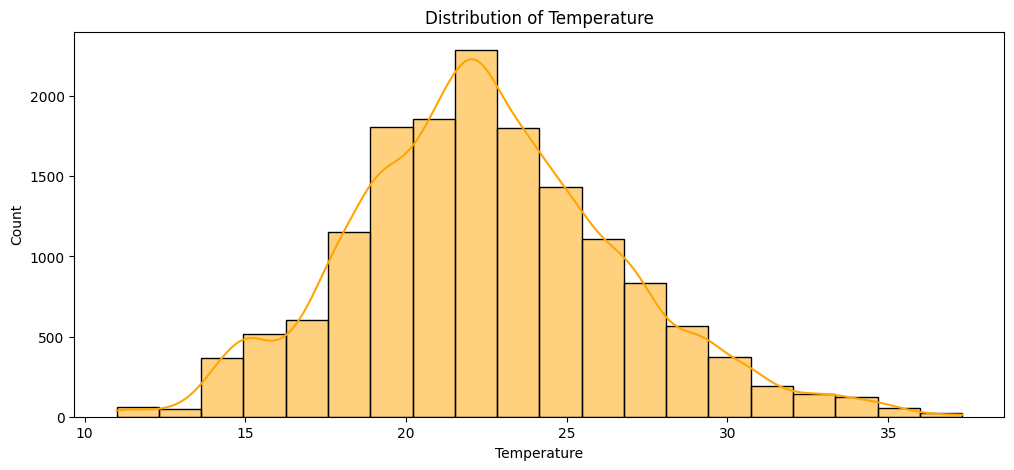

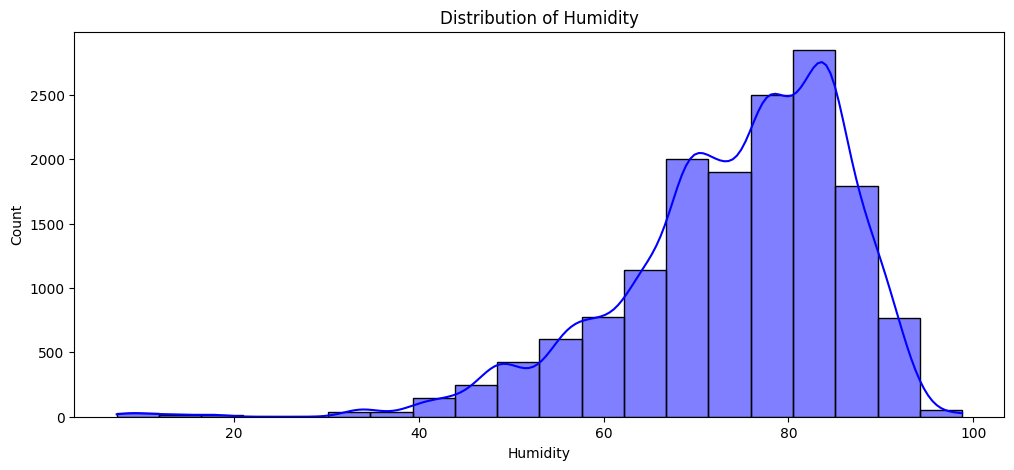

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\2058529688.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sky", order=df["Sky"].value_counts().index, palette="coolwarm")


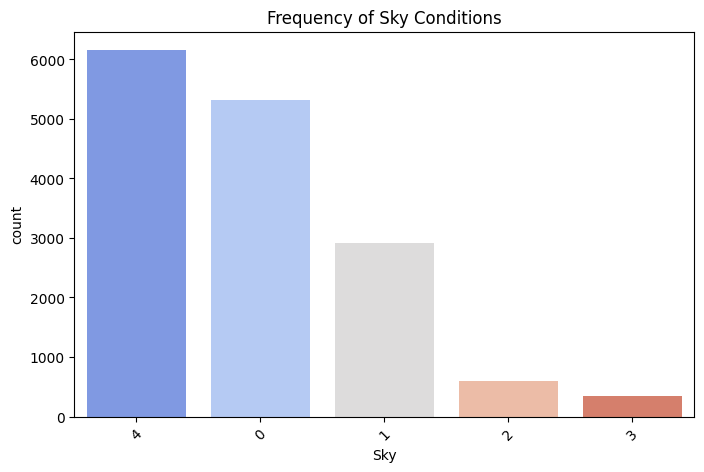

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_20544\2058529688.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Wind", order=df["Wind"].value_counts().index, palette="viridis")


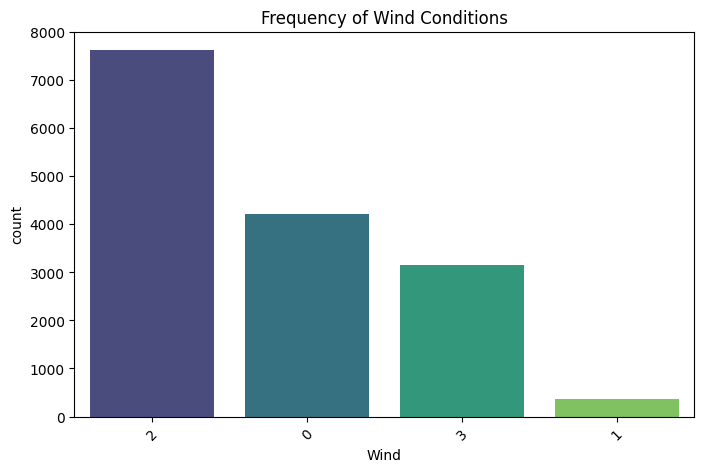

In [51]:
df = pd.concat([forest, grass], ignore_index=True)

# Convert categorical weather conditions to proper types
df['Sky'] = df['Sky'].astype(str)
df['Wind'] = df['Wind'].astype(str)

### Univariate Analysis ###
plt.figure(figsize=(12, 5))
sns.histplot(df['Temperature'], bins=20, kde=True, color='orange')
plt.title("Distribution of Temperature")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df['Humidity'], bins=20, kde=True, color='blue')
plt.title("Distribution of Humidity")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sky", order=df["Sky"].value_counts().index, palette="coolwarm")
plt.title("Frequency of Sky Conditions")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Wind", order=df["Wind"].value_counts().index, palette="viridis")
plt.title("Frequency of Wind Conditions")
plt.xticks(rotation=45)
plt.show()